# **SIOC 221A - Analysis of Physical Oceanographic Data (A) - Problem 1** 

# Caique Dias Luko 






### 1 - Statistics of sea surface temperature. Download the 2021 sea surface temperature data for the Scripps Pier from the SCCOOS web site:

### http://sccoos.org/thredds/catalog/autoss/catalog.html.

### a. Read the temperature data, and produce a line plot of the 2021 temperatures with appropriately labeled axes. What do you observe in this plot?

Let's start by defining a python function to load the pier data:

In [1]:
def GetPierData(date_start,date_end,filename):
    # This function returns temperature, pressure and time from the 2021 pier record
    # (http://sccoos.org/thredds/catalog/autoss/catalog.html)
    # date_start and date_end should be on the datetime format
    # Example:
    # If the start date is January 1st 00:02:17, date_start should be datetime.datetime(2021,1,1,0,2,17)  
    # CDL SIO211A 10/02/2022

    # Important packages
    import netCDF4 as nc              # Read nc files
    import datetime                   # Manage time vectors
    import pandas as pd               # Useful to work with DataFrames and also to manage time

    # Loading time
    dat = nc.Dataset(filename)
    time = dat['time'][:]
    
    # Converting time vector
    timev = [str(datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(d))) for d in time]
    timev = pd.to_datetime(timev)

    # Loading Temperature and Pressure data for the selected time interval
    idx = np.where((timev>=date_start)&(timev<=date_end))[0]
    temp = dat['temperature'][idx]
    pres = dat['pressure'][idx]
    timev = timev[idx]
    
    return pd.DataFrame({'temp':temp,'pres':pres,'time':timev}) # Pier object


(This function was uploaded to GitHub)

Now let's use this function to read the data:


In [2]:
# Important packages
import datetime                   # Manage time vectors
import numpy as np                # Some mathematical functions

date_start = datetime.datetime(2021,1,1,0,0)
date_end = datetime.datetime(2021,12,31,23,59)
filename = '/home/caique/Documentos/PhD_Courses/SIOC221A_DATA1/Homeworks/data/scripps_pier-2021.nc'

pier=GetPierData(date_start,date_end,filename)

temp,timev=np.array(pier.temp),np.array(pier.time)

Now, let's create our plot:

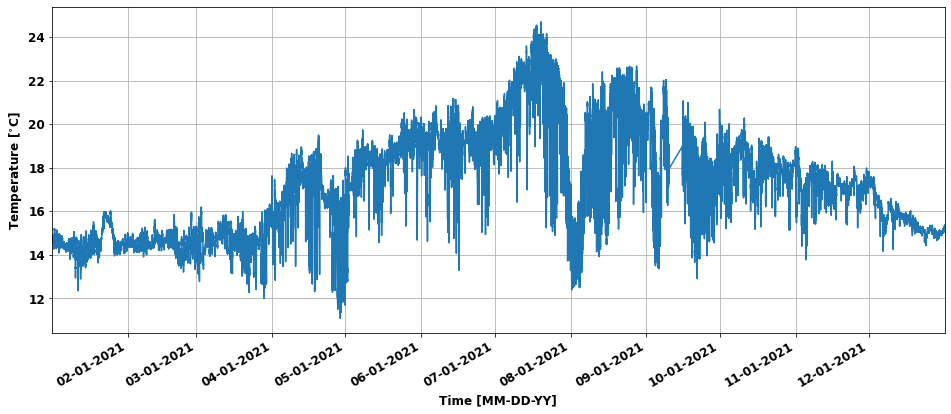

In [3]:
# Plotting packages
import matplotlib.pyplot as plt   # Plots
from matplotlib import rc         # Figure fonts
import matplotlib.dates as mdates # Manage dates on plots

#Creating plot
fig =plt.figure(figsize=(16,6))
rc('font',size=12)    
rc('font',weight='bold') 
rc('xtick',labelsize=12)  
rc('ytick',labelsize=12)

# Plot, limits and labels
ax = fig.add_subplot(111)
plt.plot(timev,temp)
plt.xlim(timev[0],timev[-1])
plt.xlabel('Time [MM-DD-YY]',fontsize=12,weight='bold')
plt.ylabel(u'Temperature [$^{\circ}$C]',fontsize=12,weight='bold')

# Setting datetick format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right') 
    
plt.grid()
plt.show()

The data shows us some intersting signals as:

- The seasonal signal: maximum (minimum) temperatures are observed during the summer (winter);
- A lot of intraseasonal variability is observed;
- There is a huge drop in Temperature in mid-August. Maybe an upwelling event happened; 
- Some gaps in the data;

### b. Compute the mean and standard deviation for the sea surface temperature data. What do these statistics tell you about the temperature in 2021?



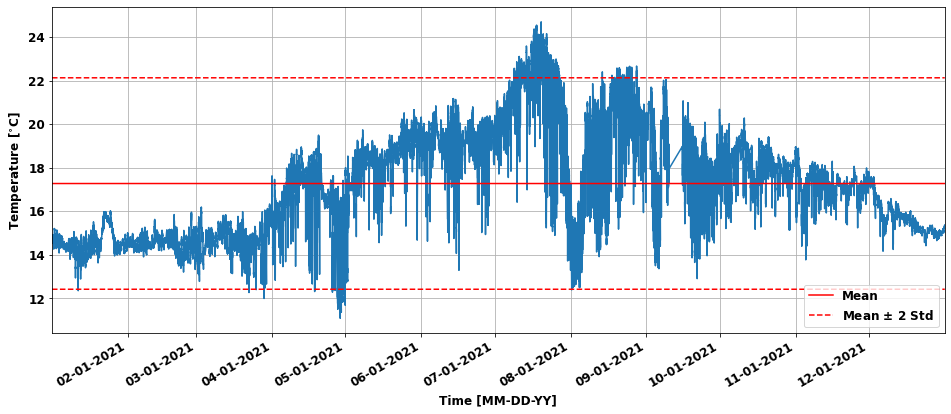

In [4]:
# Computing temperature mean and standard deviation
tmean = np.nanmean(temp) # np.nanmean disconsider NaN values
tstd = np.nanstd(temp)   # np.nanstd disconsider NaN values

#Creating plot
fig =plt.figure(figsize=(16,6))
rc('font',size=12)    
rc('font',weight='bold') 
rc('xtick',labelsize=12)  
rc('ytick',labelsize=12)

# Plot, limits and labels
ax = fig.add_subplot(111)
plt.plot(timev,temp)
plt.plot(timev,np.ones(temp.shape[0])*tmean,color='red',label='Mean')
plt.plot(timev,np.ones(temp.shape[0])*(tmean+2*tstd),linestyle='--',color='red')
plt.plot(timev,np.ones(temp.shape[0])*(tmean-2*tstd),linestyle='--',color='red',label='Mean $\pm$ 2 Std')
plt.xlim(timev[0],timev[-1])
plt.xlabel('Time [MM-DD-YY]',fontsize=12,weight='bold')
plt.ylabel(u'Temperature [$^{\circ}$C]',fontsize=12,weight='bold')
plt.legend(loc='lower right')

# Setting datetick format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right') 
    
plt.grid()
plt.show()


The statistics tells us that, in 2021:
- the average temperature was of about 17.27°C;
- assuming that the data has an approximate gaussian distribution, at the 95% confidence level, the temperature varied between 12.43°C and 22.12°C (Mean $\pm$ 2 X Standard Deviation = 17.27°C $\pm$ 2 X 2.43°C); 

### c. Compute an empirical probability density function for sea surface temperature. Does it look like any of the distributions that we discussed in class?


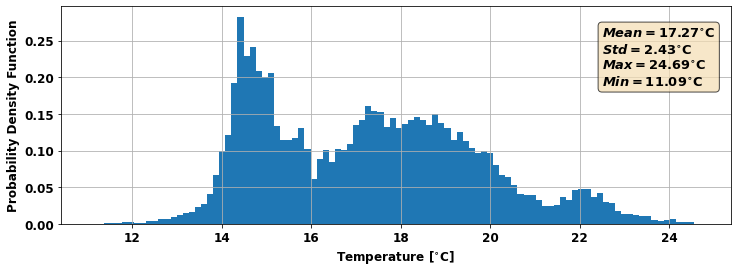

In [5]:
#Creating plot
fig =plt.figure(figsize=(12,4))
rc('font',size=12)    
rc('font',weight='bold') 
rc('xtick',labelsize=12)  
rc('ytick',labelsize=12)

# Plot, limits and labels
ax = fig.add_subplot(111)
plt.hist(temp,bins=100,density=True) # Histogram on the density mode gives us the PDF
plt.xlabel(u'Temperature [$^{\circ}$C]',fontsize=12,weight='bold')
plt.ylabel(u'Probability Density Function',fontsize=12,weight='bold')
   
# Important Statistics
textstr = '\n'.join((u'$Mean=%.2f ^{\circ}$C'% (np.nanmean(temp), ), u'$Std=%.2f ^{\circ}$C'%(np.nanstd(temp),),u'$Max=%.2f ^{\circ}$C'%(np.nanmax(temp),),u'$Min=%.2f ^{\circ}$C'%(np.nanmin(temp),)) )
props = dict(boxstyle='round', facecolor='wheat',edgecolor='k',alpha=0.7)
# place a text box in upper left in axes coords
ax.text(22.5,0.27,textstr,fontsize=13,verticalalignment='top', bbox=props,zorder=1e15)
    
plt.grid()
plt.show()


The distribution is not normal. It is actually bimodal with one peak around 14.5°C and the other around 18°C. It looks like the distribution from Lecture's 2 last plot. Probably if we use more data other than only the data from 2021, we will get a normal distribution. 

Right now, using the Mean ± 2 X Standard Deviation to find the intervals where 95% of the data lies, might not be appropriate as the temperature distribution is not normal.

### 2 - Extending the record. Now extend your record for the temperature from 2005-2021 and repeat the calculations from the first exercise. (This is a good time to practice using a loop to go through each of the data files.) What do you observe in these results? In what ways are the 2021 results different from the 2005-2021 results? Is 2021 unusual? 

Let's start by loading all the data with a for loop:

In [6]:
# For loop to download 2005-2021 pier data
for i in range(2005,2022):
    date_start = datetime.datetime(i,1,1,0,0)
    date_end = datetime.datetime(i,12,31,23,59)
    filename = '/home/caique/Documentos/PhD_Courses/SIOC221A_DATA1/Homeworks/data/scripps_pier-'+str(i)+'.nc'
    piert=GetPierData(date_start,date_end,filename) # Loading data for the i year
    if i ==2005: # Creating vector for the first year
        tempt,timevt=np.array(piert.temp),np.array(piert.time)
    else:        # Concatenating following years to the vectors
        tempt,timevt=np.concatenate((tempt,np.array(piert.temp))),np.concatenate((timevt,np.array(piert.time)))
        
import pandas as pd
timevt = pd.to_datetime(timevt) # Converting array to datetime to use some datetime properties

Now let's plot the temporal series with the average and 95% confidence interval:

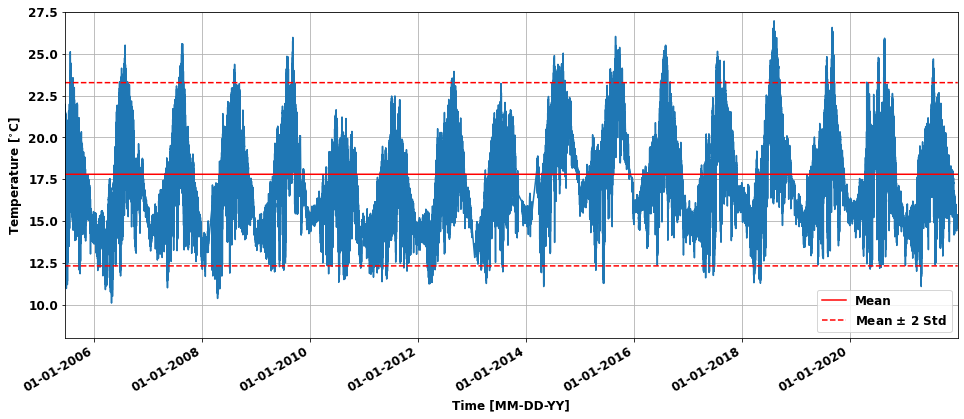

In [7]:
# Computing temperature mean and standard deviation
tmeant = np.nanmean(tempt) # np.nanmean disconsider NaN values
tstdt = np.nanstd(tempt)   # np.nanstd disconsider NaN values

#Creating plot
fig =plt.figure(figsize=(16,6))
rc('font',size=12)    
rc('font',weight='bold') 
rc('xtick',labelsize=12)  
rc('ytick',labelsize=12)

# Plot, limits and labels
ax = fig.add_subplot(111)
plt.plot(timevt,tempt)
plt.plot(timevt,np.ones(tempt.shape[0])*tmeant,color='red',label='Mean')
plt.plot(timevt,np.ones(tempt.shape[0])*(tmeant+2*tstdt),linestyle='--',color='red')
plt.plot(timevt,np.ones(tempt.shape[0])*(tmeant-2*tstdt),linestyle='--',color='red',label='Mean $\pm$ 2 Std')
plt.xlim(timevt[0],timevt[-1])
plt.ylim(8,27.5)
plt.xlabel('Time [MM-DD-YY]',fontsize=12,weight='bold')
plt.ylabel(u'Temperature [$^{\circ}$C]',fontsize=12,weight='bold')
plt.legend(loc='lower right')

# Setting datetick format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right') 
    
plt.grid()
plt.show()


And the PDF:

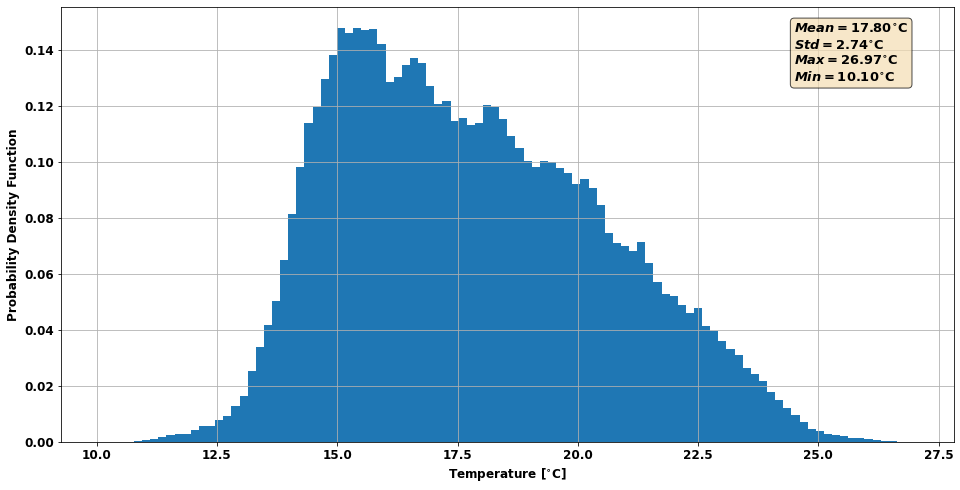

In [8]:
#Creating plot
fig =plt.figure(figsize=(16,8))
rc('font',size=12)    
rc('font',weight='bold') 
rc('xtick',labelsize=12)  
rc('ytick',labelsize=12)

# Plot, limits and labels
ax = fig.add_subplot(111)
plt.hist(tempt,bins=100,density=True) # Histogram on the density mode gives us the PDF
plt.xlabel(u'Temperature [$^{\circ}$C]',fontsize=12,weight='bold')
plt.ylabel(u'Probability Density Function',fontsize=12,weight='bold')
   
# Important Statistics
textstr = '\n'.join((u'$Mean=%.2f ^{\circ}$C'% (np.nanmean(tempt), ), u'$Std=%.2f ^{\circ}$C'%(np.nanstd(tempt),),u'$Max=%.2f ^{\circ}$C'%(np.nanmax(tempt),),u'$Min=%.2f ^{\circ}$C'%(np.nanmin(tempt),)) )
props = dict(boxstyle='round', facecolor='wheat',edgecolor='k',alpha=0.7)
# place a text box in upper left in axes coords
ax.text(24.5,0.15,textstr,fontsize=13,verticalalignment='top', bbox=props,zorder=1e15)
    
plt.grid()
plt.show()


With the extended time-series, we observe that the seasonal signal is a regular feature of the sample. Besides the intraseasonal variability, we also observe some signals of interannual variability. For instance, between 2010 to 2014, the amplitude of the seasonal cycle is smaller than usual, which might indicate the presence of interannual variability in the data.

The PDF from the extended time-series does not have a bi-modal distribution anymore. However, it is not a symmetric gaussian curve yet. It has a distinct tail towards warmer temperatures.

The year 2021 seems to be an usual year in the sense that its average and standard deviation ($\mu$ = 17.27 °C; $\sigma$ = 2.43 °C) are not that different from the mean and standard deviation from the extended time-series ($\mu$ = 17.80 °C; $\sigma$ = 2.74 °C).

### Is the sharp temperature change in August 2016 unusual?

Let's plot the record for 2016 to check the sharp temperature change:

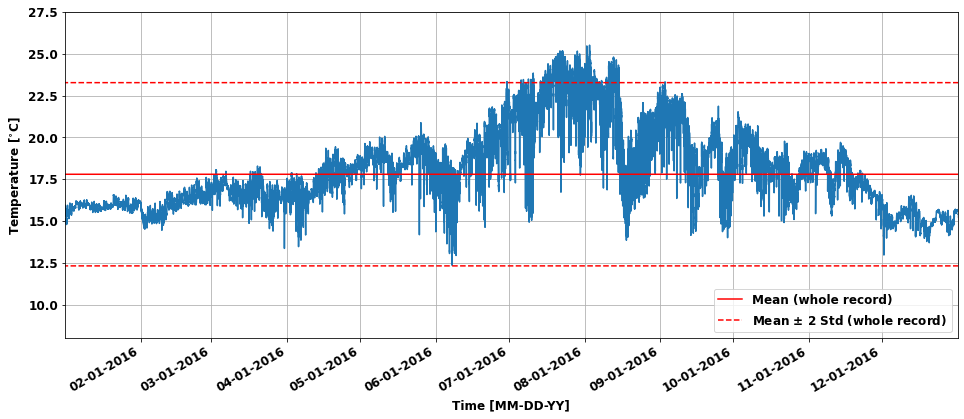

In [9]:
# Indexes for start and end of 2016
idxst = np.where(timevt.year==2016)[0][0]
idxf = np.where(timevt.year==2016)[0][-1]

#Creating plot
fig =plt.figure(figsize=(16,6))
rc('font',size=12)    
rc('font',weight='bold') 
rc('xtick',labelsize=12)  
rc('ytick',labelsize=12)

# Plot, limits and labels
ax = fig.add_subplot(111)
plt.plot(timevt,tempt)
plt.plot(timevt,np.ones(tempt.shape[0])*tmeant,color='red',label='Mean (whole record)')
plt.plot(timevt,np.ones(tempt.shape[0])*(tmeant+2*tstdt),linestyle='--',color='red')
plt.plot(timevt,np.ones(tempt.shape[0])*(tmeant-2*tstdt),linestyle='--',color='red',label='Mean $\pm$ 2 Std (whole record)')
plt.xlim(timevt[idxst],timevt[idxf])
plt.ylim(8,27.5)
plt.xlabel('Time [MM-DD-YY]',fontsize=12,weight='bold')
plt.ylabel(u'Temperature [$^{\circ}$C]',fontsize=12,weight='bold')
plt.legend(loc='lower right')

# Setting datetick format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right') 
    
plt.grid()
plt.show()


The huge temperature change in August 2016 is inside the 95% confidence interval for the whole record, and it is very similar to a temperature change observed in August 2021 (plot from question 1a). Thus, this does not seem like an unusual feature.